In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 128s 1us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_train[0].shape

(32, 32, 3)

In [9]:
#plt.imshow(x_train[89])

In [10]:
x_train[0].max()

255

In [11]:
x_train = x_train/255

In [12]:
x_test = x_test/255

In [13]:
x_test.shape

(10000, 32, 32, 3)

In [15]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_cat_train = to_categorical(y_train,10)

In [18]:
y_cat_test = to_categorical(y_test,10)

In [19]:
y_train[0]

array([6], dtype=uint8)

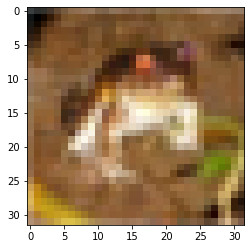

In [20]:
plt.imshow(x_train[0])

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [22]:
model = Sequential()

#convolution layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
#Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))


#convolution layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
#Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
          
model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [26]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 31s 19ms/step - loss: 1.4828 - accuracy: 0.4615 - val_loss: 1.3264 - val_accuracy: 0.5215
Epoch 2/15
1563/1563 [==============================] - 32s 20ms/step - loss: 1.1518 - accuracy: 0.5931 - val_loss: 1.1259 - val_accuracy: 0.6057
Epoch 3/15
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0031 - accuracy: 0.6507 - val_loss: 1.0255 - val_accuracy: 0.6354
Epoch 4/15
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8982 - accuracy: 0.6876 - val_loss: 1.0104 - val_accuracy: 0.6496
Epoch 5/15
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8110 - accuracy: 0.7166 - val_loss: 0.9920 - val_accuracy: 0.6556
Epoch 6/15
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7286 - accuracy: 0.7436 - val_loss: 0.9441 - val_accuracy: 0.6762
Epoch 7/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6497 - accuracy: 0.7750 - val_loss: 0.9808 -

In [30]:
metrics = pd.DataFrame(model.history.history)

In [31]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.482827,0.46152,1.326372,0.5215
1,1.151796,0.59306,1.125933,0.6057
2,1.003114,0.65074,1.025461,0.6354
3,0.898215,0.68756,1.010435,0.6496
4,0.810975,0.71658,0.992016,0.6556


In [32]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<AxesSubplot:>

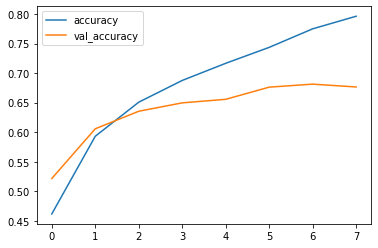

In [33]:
metrics[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

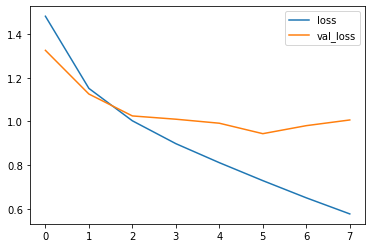

In [34]:
metrics[['loss', 'val_loss']].plot()

In [35]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.0069471597671509, 0.6765000224113464]

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72      1000
           1       0.80      0.80      0.80      1000
           2       0.62      0.48      0.54      1000
           3       0.50      0.46      0.48      1000
           4       0.63      0.58      0.61      1000
           5       0.57      0.58      0.57      1000
           6       0.61      0.85      0.71      1000
           7       0.79      0.70      0.74      1000
           8       0.80      0.76      0.78      1000
           9       0.76      0.79      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000



<AxesSubplot:>

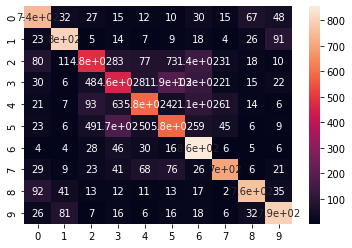

In [39]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [47]:
my_image = x_test[16]

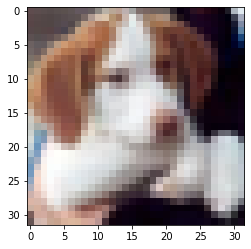

In [48]:
plt.imshow(my_image)

In [49]:
y_test[16]

array([5], dtype=uint8)

In [44]:
t = my_image.reshape(1,32,32,3)

In [45]:
predict_x=model.predict(t) 
classes_x=np.argmax(predict_x,axis=1)

In [46]:
classes_x

array([3], dtype=int64)